# Keras MLP example for MNIST dataset
[keras MNIST MLP example](https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py)

Check Avalable GPU

In [1]:
!nvidia-smi

Wed Sep  5 23:01:36 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    29W / 149W |      0MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Step1.
configure tensorflow option

In [0]:
'''
this is critical option. TF memory control allow_growth is mandatory option
'''
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config )

check available GPU memory

In [3]:
!nvidia-smi   | grep MiB

| N/A   36C    P0    58W / 149W |    115MiB / 11439MiB |      0%      Default |


## import keras


In [11]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

print('tensorflow ver. :',tf.__version__)
print('keras      ver. :', keras.__version__)

tensorflow ver. : 1.10.1
keras      ver. : 2.1.6


## download mnist dataset and prepare train/test dataset

In [12]:
%%time
# the data, split between train and test sets
#it will take time to download
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step
CPU times: user 404 ms, sys: 110 ms, total: 514 ms
Wall time: 1.79 s


## reshape the dataset for keras category label

In [13]:
%%time
num_classes = 10


x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#for confusion matrix we need original label format
y_test_cls=y_test
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


60000 train samples
10000 test samples
CPU times: user 83.2 ms, sys: 95.4 ms, total: 179 ms
Wall time: 180 ms


Check Dataset with Histogram

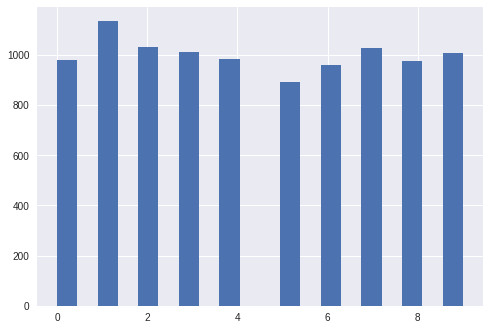

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(y_test_cls, bins=20 )
plt.show()

## define model MLP(Multi Layer Perceptron)

In [15]:


model = Sequential()
model.add( Dense(512, activation='relu', input_shape=(784,)) )
model.add( Dense(512, activation='relu') )
model.add( Dropout(0.2) )
model.add( Dense(num_classes, activation='softmax') )

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Configure Loss function and solver

In [0]:
#configure loss 
#configure solver(optimizer) sgd, adam
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [17]:
epochs = 10
batch_size = 128

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3, 
                    shuffle=True)


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 76us/step - loss: 0.2666 - acc: 0.9192 - val_loss: 0.1282 - val_acc: 0.9604
Epoch 2/10
42000/42000 [==============================] - 3s 74us/step - loss: 0.0986 - acc: 0.9697 - val_loss: 0.1707 - val_acc: 0.9481
Epoch 3/10
42000/42000 [==============================] - 3s 75us/step - loss: 0.0633 - acc: 0.9813 - val_loss: 0.1038 - val_acc: 0.9728
Epoch 4/10
42000/42000 [==============================] - 3s 75us/step - loss: 0.0442 - acc: 0.9864 - val_loss: 0.0997 - val_acc: 0.9764
Epoch 5/10
42000/42000 [==============================] - 3s 70us/step - loss: 0.0326 - acc: 0.9897 - val_loss: 0.1102 - val_acc: 0.9752
Epoch 6/10
42000/42000 [==============================] - 3s 68us/step - loss: 0.0254 - acc: 0.9918 - val_loss: 0.1244 - val_acc: 0.9741
Epoch 7/10
42000/42000 [==============================] - 3s 67us/step - loss: 0.0202 - acc: 0.9937 - val_loss: 0.1670 - val_acc

## check test dataset

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13857176047242134
Test accuracy: 0.9773


In [19]:
y_test_cls

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
y_pred =model.predict_classes(x_test)
y_pred


array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import pandas as pd
pd_label = pd.DataFrame()
pd_label["true"]=y_test_cls
pd_label["pred"]=y_pred
pd_label

In [24]:
  
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test_cls, y_pred=y_pred)    
cm

array([[ 969,    1,    0,    1,    2,    1,    4,    1,    1,    0],
       [   0, 1124,    3,    1,    0,    1,    2,    0,    3,    1],
       [   0,    1, 1016,    0,    4,    0,    2,    6,    3,    0],
       [   1,    1,    6,  985,    0,    7,    0,    4,    2,    4],
       [   0,    0,    3,    0,  968,    0,    2,    1,    0,    8],
       [   2,    0,    0,   10,    2,  866,    8,    0,    2,    2],
       [   3,    3,    1,    1,    8,    1,  940,    0,    1,    0],
       [   0,    3,    8,    3,    2,    0,    0, 1008,    2,    2],
       [  10,    0,    5,    9,    7,   12,    3,    2,  920,    6],
       [   1,    2,    0,    4,   12,    2,    1,    9,    1,  977]])

# rerun
Keras train use last snapshot w/o any model modification

In [25]:
epochs = 5
batch_size = 128

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3,
                    shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 3s 63us/step - loss: 0.0105 - acc: 0.9966 - val_loss: 0.1566 - val_acc: 0.9745
Epoch 2/5
42000/42000 [==============================] - 3s 69us/step - loss: 0.0097 - acc: 0.9972 - val_loss: 0.1527 - val_acc: 0.9770
Epoch 3/5
42000/42000 [==============================] - 3s 67us/step - loss: 0.0104 - acc: 0.9968 - val_loss: 0.1724 - val_acc: 0.9747
Epoch 4/5
42000/42000 [==============================] - 3s 67us/step - loss: 0.0080 - acc: 0.9974 - val_loss: 0.1647 - val_acc: 0.9776
Epoch 5/5
42000/42000 [==============================] - 3s 66us/step - loss: 0.0078 - acc: 0.9978 - val_loss: 0.1665 - val_acc: 0.9776


In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13951365937084703
Test accuracy: 0.9811


In [26]:
y_pred2 =model.predict_classes(x_test)
cm = confusion_matrix(y_true=y_test_cls, y_pred=y_pred2)    
cm

array([[ 970,    1,    0,    1,    0,    1,    3,    1,    3,    0],
       [   0, 1130,    2,    0,    0,    0,    1,    0,    2,    0],
       [   0,    2, 1018,    2,    1,    0,    1,    3,    5,    0],
       [   0,    1,    4,  993,    0,    2,    0,    4,    3,    3],
       [   1,    1,    2,    0,  958,    0,    5,    1,    2,   12],
       [   2,    0,    0,   11,    1,  869,    4,    1,    2,    2],
       [   4,    4,    0,    1,    1,    3,  942,    0,    3,    0],
       [   0,    7,   14,    3,    1,    0,    0, 1000,    2,    1],
       [   1,    0,    2,    6,    3,    2,    1,    3,  954,    2],
       [   3,    5,    1,    6,    8,    1,    0,    4,    4,  977]])